In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DF = pd.read_csv("1992"+"_omega_results.csv")
dfslope = pd.read_csv("1992"+"_slopes.csv")
DF = pd.concat([DF, dfslope], axis=1)

In [3]:
for i in range(1,29):
    year = str(1992+i)
    df_year = pd.read_csv(str(1992+i)+"_omega_results.csv")
    df_yslope = pd.read_csv(str(1992+i)+"_slopes.csv")
    df_year = pd.concat([df_year, df_yslope], axis =1)
    DF = pd.concat([DF, df_year],
                  ignore_index = True)
print(DF)

    Year  NumberClubs  NumberTransfers  SmallWorldOmega  DisparityExponent  \
0   1992          171              237         0.581490          -0.732862   
1   1993          192              298         0.480720          -0.680303   
2   1994          214              355         0.404461          -0.705777   
3   1995          241              407         0.655797          -0.706492   
4   1996          276              439         0.563194          -0.697948   
5   1997          306              521         0.725853          -0.708649   
6   1998          307              516         0.614493          -0.689463   
7   1999          315              546         0.642537          -0.699783   
8   2000          370              638         0.645460          -0.684066   
9   2001          358              608         0.731351          -0.693966   
10  2002          302              431         0.430325          -0.663893   
11  2003          338              500         0.654352         

### Standard Deviations and R^2 of Slopes

In [4]:
print(max(DF["StandError Slope In"]), 
      max(DF["StandError Slope Out"]),
      max(DF["StandError Disparity"]))

0.3979995349119091 1.1328783715501176 0.0207111700466492


In [5]:
print("ratio IN",max(abs(DF["StandError Slope In"]/DF["Slope In-Degree"])))
print("ratio Disp",max(abs(DF["StandError Disparity"]/DF["Slope Disparity"])))

ratio IN 0.17625256905662984
ratio Disp 0.03044403936001774


In [6]:
print(min(DF["R^2 In-Degree"]), 
      min(DF["R^2 Out-Degree"]), 
      min(DF["R^2 Disparity"]))

0.8894740660525395 0.6751715153607327 0.8502681877591804


In [7]:
print(DF["Slope In-Degree"]-2*DF["StandError Slope In"])

0    -3.054120
1    -2.304777
2    -2.386950
3    -2.501886
4    -2.831833
5    -2.274414
6    -3.058003
7    -2.642986
8    -2.632551
9    -3.020818
10   -2.617449
11   -2.926464
12   -2.612165
13   -2.668427
14   -2.383440
15   -2.545845
16   -2.533724
17   -2.522355
18   -2.441603
19   -2.267781
20   -2.224113
21   -2.132183
22   -2.351005
23   -2.257254
24   -2.379513
25   -2.233426
26   -2.198949
27   -1.838362
28   -2.527260
dtype: float64


### Some time series plots

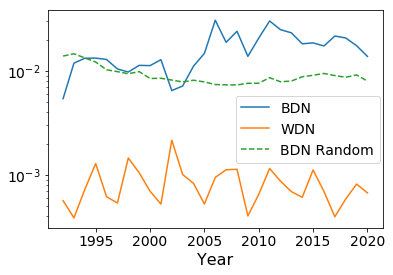

In [46]:
plt.plot(DF["Year"], DF["BDN_Clustering"], label="BDN")
plt.plot(DF["Year"], DF["WDN_Clustering"],label="WDN")
plt.plot(DF["Year"], DF["BDN_RandomClusteringExpecation"], 
         '--',label="BDN Random", )
plt.yscale('log')
plt.xlabel("Year",fontsize=16)
#plt.ylabel("Clustering Coefficient [log]",fontsize=16)
plt.legend(fontsize=14,loc="best",bbox_to_anchor=(0.54,0.64))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
#plt.title("Temporal Change of Clustering Coefficients",fontsize=20)
plt.savefig("ClusteringCoefficients.png",bbox_inches='tight', dpi=1200)
plt.show()

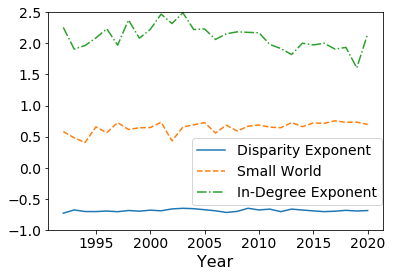

In [47]:
plt.plot(DF["Year"], DF["DisparityExponent"],"-",label= "Disparity Exponent")
plt.plot(DF["Year"], DF["SmallWorldOmega"], "--",label = "Small World")
plt.plot(DF["Year"], -DF["Slope In-Degree"], "-.",label= "In-Degree Exponent")

#plt.yscale('log')
plt.xlabel("Year",fontsize=16)
plt.ylabel("")
plt.ylim([-1, 2.5])

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.legend(fontsize=14, loc = "lower right",bbox_to_anchor=(1.019, 0.08))
plt.title("")
plt.savefig("Exponents_and_SmallWorld.png",bbox_inches='tight', dpi=1200)
plt.show()

In [10]:
print(min(DF["DisparityExponent"]), max(DF["DisparityExponent"]))

-0.7328620979285003 -0.6538343708791139


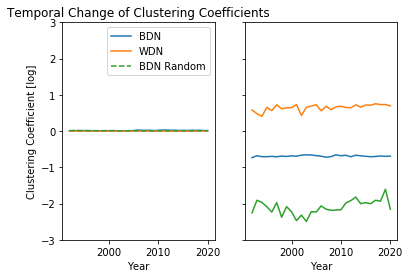

In [11]:


# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(DF["Year"], DF["BDN_Clustering"], label="BDN")
ax1.plot(DF["Year"], DF["WDN_Clustering"],label="WDN")
ax1.plot(DF["Year"], DF["BDN_RandomClusteringExpecation"], 
         '--',label="BDN Random", )
ax1.set_yscale('log')
ax1.set_xlabel("Year")
ax1.set_ylabel("Clustering Coefficient [log]")
ax1.legend()
ax1.set_title("Temporal Change of Clustering Coefficients")

ax2.set_yscale('linear')
ax2.plot(DF["Year"], DF["DisparityExponent"],label= "Disparity Exponent")
ax2.plot(DF["Year"], DF["SmallWorldOmega"], label = "Small World")
ax2.plot(DF["Year"], DF["Slope In-Degree"], label= "In-Degree Exponent")
ax2.set_xlabel("Year")
ax2.set_ylabel("")
ax2.set_ylim([-3, 3])
ax2.set_title("")
plt.show()

In [12]:
DF.columns

Index(['Year', 'NumberClubs', 'NumberTransfers', 'SmallWorldOmega',
       'DisparityExponent', 'BDN_RandomClusteringExpecation', 'BDN_Clustering',
       'WDN_Clustering', 'MeanLogStrength', 'StdLogStrength',
       'SkewnessLogStrength', 'Slope In-Degree', 'StandError Slope In',
       'R^2 In-Degree', 'Slope Out-Degree', 'StandError Slope Out',
       'R^2 Out-Degree', 'Slope Disparity', 'StandError Disparity',
       'R^2 Disparity'],
      dtype='object')

In [13]:
columns = DF.columns
columns = columns[1:] # without year

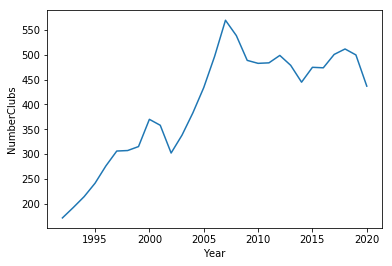

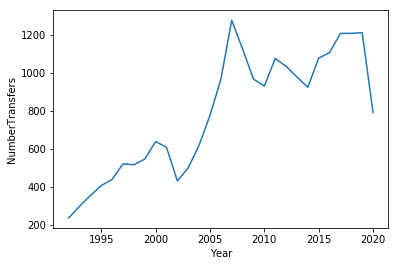

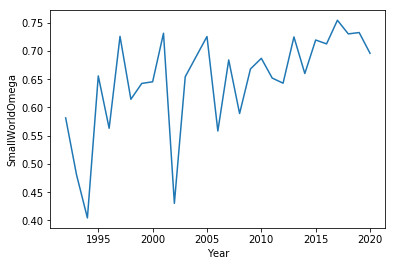

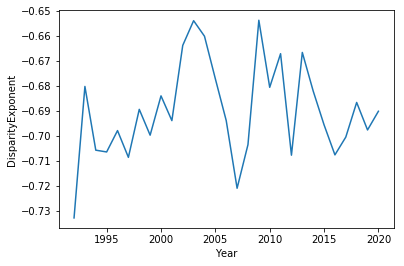

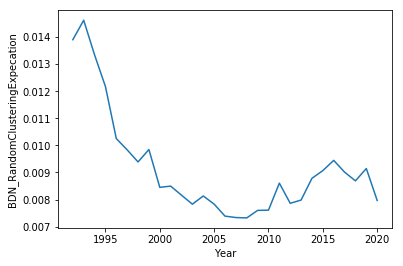

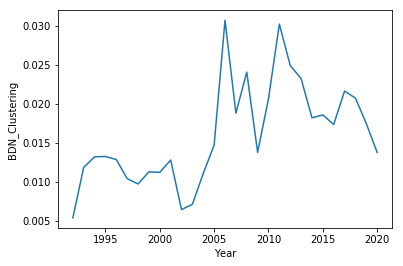

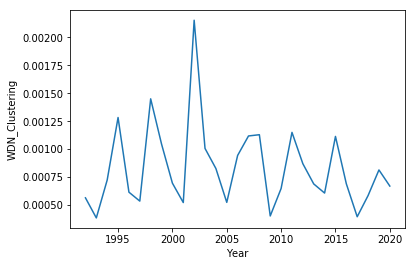

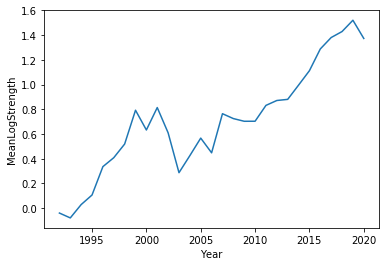

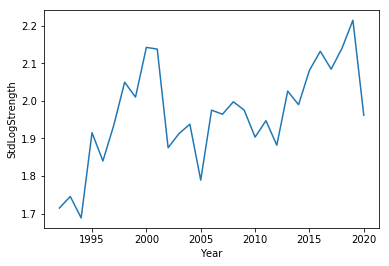

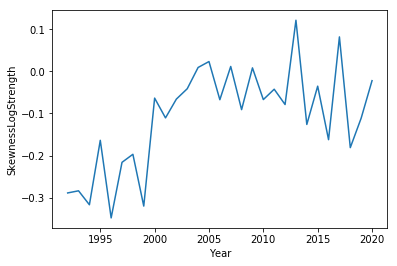

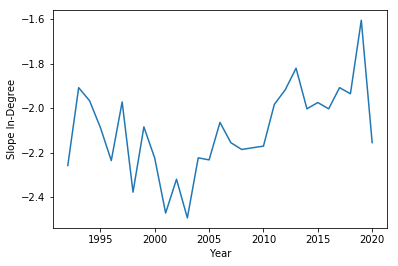

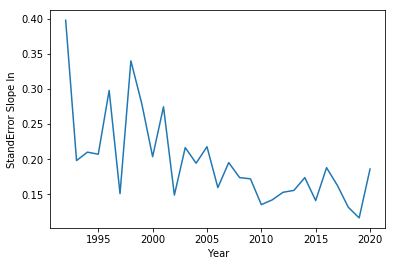

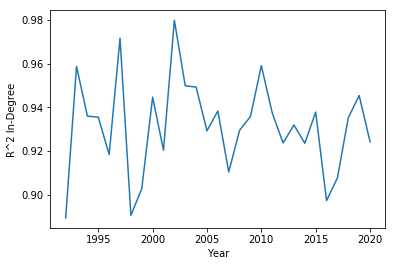

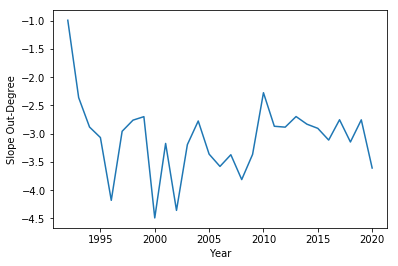

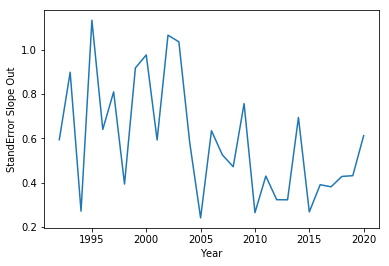

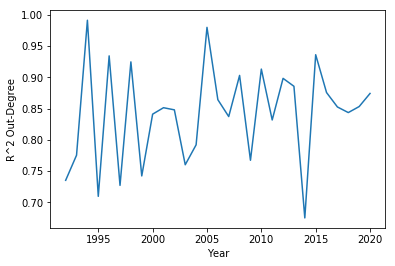

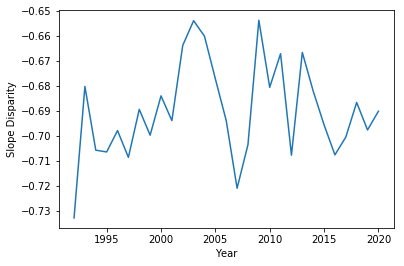

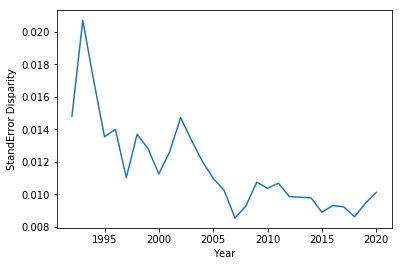

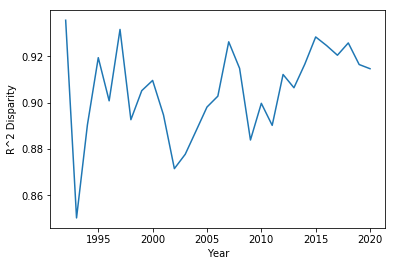

In [14]:
for c in columns:
    plt.figure()
    plt.plot(DF["Year"], DF[c])
    plt.xlabel("Year")
    plt.ylabel(c)
    plt.show()

In [15]:
np.sum(DF["NumberTransfers"])

22750

# 10x10 Matrices

In [16]:
def Inertia(DF):
    # takes square Data Frame
    # returns the same data on the diagonal and everything else as -original data
    matrix = DF.to_numpy()
    Diagonal = np.diagonal(matrix)
    offDiag = np.diag(Diagonal) - matrix
    return(np.diag(Diagonal) + offDiag)

In [17]:
Matrices = []
Matrices.append(pd.read_csv("10x10_1992", index_col=0))

In [18]:
Matrices[0]

,BL,PL,SerieA,LaLiga,Ligue1,Portug,NED,Championship,RUS,Others
BL,22.790,0.000,21.115,0.000,0.000,0.00,0.000,0.000,0.00,9.776
PL,0.000,87.412,8.190,0.000,3.393,0.00,0.000,38.587,0.36,32.130
SerieA,21.115,8.190,46.566,1.800,17.100,0.00,2.600,1.530,0.00,53.770
LaLiga,0.000,0.000,1.800,9.616,0.000,0.00,0.327,0.000,0.00,2.520
Ligue1,0.000,3.393,17.100,0.000,0.000,0.00,0.000,2.943,0.00,16.054
Portug,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,2.250
NED,0.000,0.000,2.600,0.327,0.000,0.00,8.432,0.000,0.00,2.350
Championship,0.000,38.587,1.530,0.000,2.943,0.00,0.000,12.686,0.00,22.875
RUS,0.000,0.360,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.000
Others,9.776,32.130,53.770,2.520,16.054,2.25,2.350,22.875,0.00,0.000


In [19]:
for i in range(1,29):
    Matrices.append(pd.read_csv("10x10_"+str(1992+i),
                                index_col=0))

In [20]:
print(len(Matrices))
print(Matrices[13])

29
                  BL       PL   SerieA   LaLiga   Ligue1  Portug     NED  \
BL            63.630   19.405    6.750   16.020    0.180   1.620  12.263   
PL            19.405  227.850   18.000   90.540   56.790   2.700  22.950   
SerieA         6.750   18.000   68.850   23.490    3.960   1.040   1.350   
LaLiga        16.020   90.540   23.490  163.620    6.390  19.710   8.010   
Ligue1         0.180   56.790    3.960    6.390  106.380   4.343   0.000   
Portug         1.620    2.700    1.040   19.710    4.343  10.800   0.000   
NED           12.263   22.950    1.350    8.010    0.000   0.000  27.414   
Championship   0.473   93.859    0.000    0.000    0.000   0.000   0.833   
RUS            4.050   13.050    0.000    0.000    2.880  40.500   0.180   
Others        54.791  131.803  163.555   94.879  115.497  68.341  29.584   

              Championship     RUS   Others  
BL                   0.473   4.050   54.791  
PL                  93.859  13.050  131.803  
SerieA               0

In [21]:
A = 0
for m in Matrices:
    A += m
print(A)

                    BL         PL    SerieA    LaLiga    Ligue1    Portug  \
BL            3923.306   1611.821   762.390   864.646   544.740   158.500   
PL            1611.821  10691.594  1757.455  3503.961  1867.358   934.682   
SerieA         762.390   1757.455  8968.464  2048.444   913.040   337.677   
LaLiga         864.646   3503.961  2048.444  4791.940  1226.205  1133.991   
Ligue1         544.740   1867.358   913.040  1226.205  2981.104   357.820   
Portug         158.500    934.682   337.677  1133.991   357.820   360.738   
NED            274.607    861.488   356.143   368.876    78.580    51.675   
Championship    90.138   3514.983   170.004   127.810   223.696    82.396   
RUS            121.320    310.542   155.936   182.880   200.930   234.325   
Others        3412.415   7283.765  8002.414  4299.442  3838.814  1734.024   

                   NED  Championship       RUS    Others  
BL             274.607        90.138   121.320  3412.415  
PL             861.488      3514.9

In [22]:
for m in Matrices:
    eigenValues, eigenVectors = np.linalg.eig(Inertia(m))

    idx = abs(eigenValues).argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    print(eigenValues)
    print("First Eigenvalue", eigenValues[0]/ sum(eigenValues**2)**0.5)
    print(eigenVectors[0])
    print(" # # # # # ")

[ 1.08582384e+02  8.57297768e+01 -6.68864759e+01  3.26265673e+01
  1.08226101e+01  9.47195376e+00  7.50399335e+00 -3.62984744e-01
  3.74631873e-02 -2.32880277e-02]
First Eigenvalue 0.6875427696599359
[-0.00201959 -0.19938876  0.17899183  0.74430516 -0.50064303 -0.1705981
 -0.25061839  0.16850232  0.05523251 -0.01453961]
 # # # # # 
[ 1.49265666e+02 -6.17058094e+01  6.12270916e+01  4.20981558e+01
  2.14276715e+01  1.44153319e+01 -8.30500072e+00 -4.04886967e+00
  1.91367910e+00  3.00838034e-02]
First Eigenvalue 0.8297040933833983
[-0.01154027  0.17702711  0.27589909  0.57467537 -0.7481341   0.01547144
  0.02839349 -0.00397549  0.03553709  0.01128088]
 # # # # # 
[ 1.90358194e+02 -7.08631309e+01  5.65052536e+01  5.39957120e+01
  3.86943816e+01  1.35933120e+01 -4.70925074e+00  2.96805716e+00
 -1.72049552e-02 -7.32424065e-03]
First Eigenvalue 0.859256296943509
[ 0.04882459 -0.24565867  0.34834271  0.65994524 -0.14307649  0.56378622
  0.17556191  0.10367054  0.02207589  0.0038624 ]
 # # # # 

In [23]:
eigenValues, eigenVectors = np.linalg.eig(Matrices[13])
print(eigenValues)
print(eigenVectors)

[ 460.69583128 -202.35822575  164.19450138  133.05787611  -27.22625565
  -14.86140876   23.61173137   82.97742825   61.24340902   66.27111275]
[[ 1.23696279e-01  1.24365882e-01 -1.18881140e-01  6.93290370e-02
   7.13768342e-03 -2.94421302e-02  2.92461885e-01  2.85681940e-01
   8.76863485e-01 -1.15488679e-01]
 [ 6.13993641e-01  1.38681645e-01  5.88272236e-01 -1.74502311e-01
  -3.53909449e-01  2.82600145e-01  4.21316207e-03  1.41042221e-01
  -4.68303291e-02  6.74177048e-03]
 [ 2.65762267e-01  4.42944753e-01 -5.10718173e-01  1.63177285e-02
  -7.54466653e-03  3.51945245e-02  2.23237188e-02  3.67095504e-01
  -2.26427075e-01  5.33149874e-01]
 [ 3.89913041e-01  1.17659033e-01  4.41518153e-02  8.01545809e-01
   2.09119281e-01 -5.54137207e-02  2.33394743e-02 -3.76315143e-01
  -2.02193272e-02 -1.81910057e-02]
 [ 2.73831332e-01  2.53438431e-01 -1.94987881e-01 -5.25929305e-01
   1.39098114e-01 -8.85181566e-02  1.40101697e-02 -6.99818940e-01
   1.65265621e-01  4.15228466e-02]
 [ 1.11366735e-01  1.9

In [24]:
for i in range(10):
    print(sum(eigenVectors[i]**2))
eigenVectors

1.0000000000000007
0.9999999999999994
0.9999999999999998
1.0000000000000004
0.9999999999999994
0.9999999999999989
0.9999999999999996
1.0000000000000013
0.9999999999999996
1.0000000000000009


array([[ 1.23696279e-01,  1.24365882e-01, -1.18881140e-01,
         6.93290370e-02,  7.13768342e-03, -2.94421302e-02,
         2.92461885e-01,  2.85681940e-01,  8.76863485e-01,
        -1.15488679e-01],
       [ 6.13993641e-01,  1.38681645e-01,  5.88272236e-01,
        -1.74502311e-01, -3.53909449e-01,  2.82600145e-01,
         4.21316207e-03,  1.41042221e-01, -4.68303291e-02,
         6.74177048e-03],
       [ 2.65762267e-01,  4.42944753e-01, -5.10718173e-01,
         1.63177285e-02, -7.54466653e-03,  3.51945245e-02,
         2.23237188e-02,  3.67095504e-01, -2.26427075e-01,
         5.33149874e-01],
       [ 3.89913041e-01,  1.17659033e-01,  4.41518153e-02,
         8.01545809e-01,  2.09119281e-01, -5.54137207e-02,
         2.33394743e-02, -3.76315143e-01, -2.02193272e-02,
        -1.81910057e-02],
       [ 2.73831332e-01,  2.53438431e-01, -1.94987881e-01,
        -5.25929305e-01,  1.39098114e-01, -8.85181566e-02,
         1.40101697e-02, -6.99818940e-01,  1.65265621e-01,
         4.

In [25]:
v = np.ones(10)
print(v)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
Matrices[13]

,BL,PL,SerieA,LaLiga,Ligue1,Portug,NED,Championship,RUS,Others
BL,63.630,19.405,6.750,16.020,0.180,1.620,12.263,0.473,4.050,54.791
PL,19.405,227.850,18.000,90.540,56.790,2.700,22.950,93.859,13.050,131.803
SerieA,6.750,18.000,68.850,23.490,3.960,1.040,1.350,0.000,0.000,163.555
LaLiga,16.020,90.540,23.490,163.620,6.390,19.710,8.010,0.000,0.000,94.879
Ligue1,0.180,56.790,3.960,6.390,106.380,4.343,0.000,0.000,2.880,115.497
Portug,1.620,2.700,1.040,19.710,4.343,10.800,0.000,0.000,40.500,68.341
NED,12.263,22.950,1.350,8.010,0.000,0.000,27.414,0.833,0.180,29.584
Championship,0.473,93.859,0.000,0.000,0.000,0.000,0.833,27.914,0.000,25.872
RUS,4.050,13.050,0.000,0.000,2.880,40.500,0.180,0.000,36.630,75.382
Others,54.791,131.803,163.555,94.879,115.497,68.341,29.584,25.872,75.382,14.518


In [27]:

for i in range(10):
    v = np.matmul(Matrices[13],v)
    v = v/np.sum(v)
print(v)

BL              0.046822
PL              0.232393
SerieA          0.100603
LaLiga          0.147581
Ligue1          0.103651
Portug          0.042158
NED             0.029739
Championship    0.061822
RUS             0.045991
Others          0.189241
dtype: float64


In [28]:
len(Matrices)

29

In [29]:
Matrices[0]

,BL,PL,SerieA,LaLiga,Ligue1,Portug,NED,Championship,RUS,Others
BL,22.790,0.000,21.115,0.000,0.000,0.00,0.000,0.000,0.00,9.776
PL,0.000,87.412,8.190,0.000,3.393,0.00,0.000,38.587,0.36,32.130
SerieA,21.115,8.190,46.566,1.800,17.100,0.00,2.600,1.530,0.00,53.770
LaLiga,0.000,0.000,1.800,9.616,0.000,0.00,0.327,0.000,0.00,2.520
Ligue1,0.000,3.393,17.100,0.000,0.000,0.00,0.000,2.943,0.00,16.054
Portug,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,2.250
NED,0.000,0.000,2.600,0.327,0.000,0.00,8.432,0.000,0.00,2.350
Championship,0.000,38.587,1.530,0.000,2.943,0.00,0.000,12.686,0.00,22.875
RUS,0.000,0.360,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.000
Others,9.776,32.130,53.770,2.520,16.054,2.25,2.350,22.875,0.00,0.000


In [30]:
Matrices[0].sum()

BL               53.681
PL              170.072
SerieA          152.671
LaLiga           14.263
Ligue1           39.490
Portug            2.250
NED              13.709
Championship     78.621
RUS               0.360
Others          141.725
dtype: float64

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


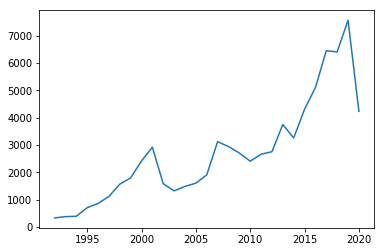

In [31]:
TotalVolume = np.empty(len(Matrices))

for i in range(len(Matrices)):
    TotalVolume[i] = Matrices[i].sum().sum()/2. # else we count transfers twice

plt.plot(DF["Year"], TotalVolume)
plt.show()

In [32]:
TotalVolume

array([ 333.421,  379.867,  394.288,  707.561,  860.817, 1119.083,
       1567.077, 1797.379, 2417.283, 2921.575, 1584.057, 1324.159,
       1486.318, 1604.843, 1906.42 , 3122.707, 2946.925, 2709.203,
       2408.866, 2664.416, 2756.723, 3749.862, 3260.424, 4309.819,
       5105.099, 6452.923, 6407.134, 7567.373, 4233.636])

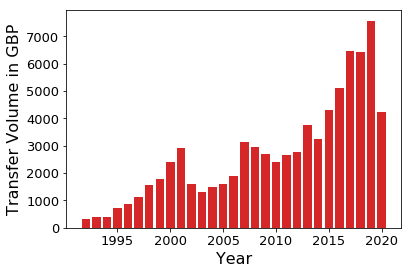

In [33]:
color="tab:red"
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.xlabel("Year", fontsize = 16)
plt.ylabel('Transfer Volume in GBP', fontsize = 16)#color=color)  # we already handled the x-label with ax1
plt.bar(DF["Year"], TotalVolume, color=color)
#plt.tick_params(axis='y', labelcolor=color)
plt.savefig("TransferVolume")
plt.show()

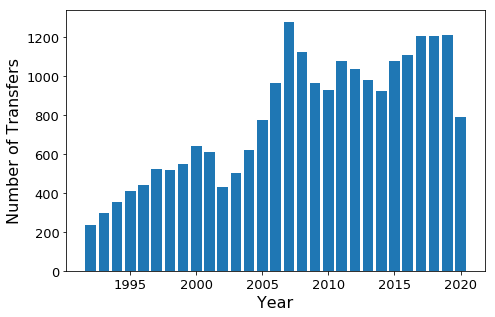

In [34]:
color = 'tab:blue'
plt.figure(figsize=(7.5, 4.8))
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.xlabel("Year", fontsize = 16)
plt.ylabel('Number of Transfers', fontsize = 16)#color=color)  # we already handled the x-label with ax1
plt.bar(DF["Year"], DF["NumberTransfers"], color=color)
#plt.tick_params(axis='y', labelcolor=color)
plt.savefig("TransferNumbers")
plt.show()

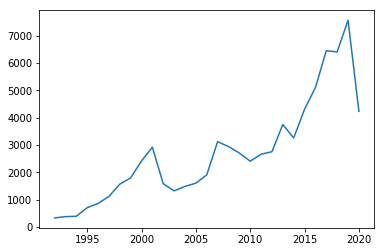

In [35]:
plt.plot(DF["Year"], TotalVolume)
plt.show()

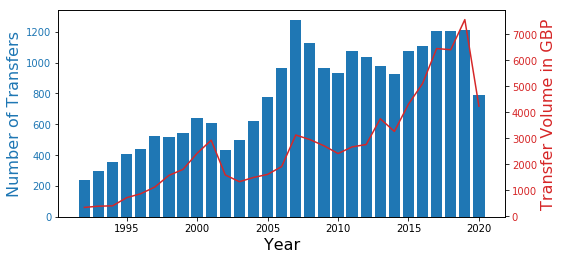

In [36]:

fig, ax1 = plt.subplots()
fig.set_figheight(3.8)
fig.set_figwidth(8.0)



color = 'tab:blue'
ax1.set_xlabel("Year", fontsize = 16)
ax1.set_ylabel('Number of Transfers', fontsize = 16, color=color)  # we already handled the x-label with ax1
ax1.bar(DF["Year"], DF["NumberTransfers"], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_xlabel('Year')
ax2.set_ylabel('Transfer Volume in GBP', fontsize = 16, color=color)
ax2.plot(DF["Year"], TotalVolume,color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("EmpiricalDataSmall", dpi=1200)
plt.show()

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


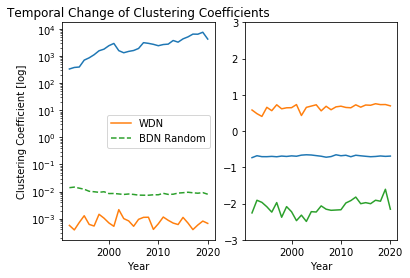

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(DF["Year"], TotalVolume)
ax1.plot(DF["Year"], DF["WDN_Clustering"],label="WDN")
ax1.plot(DF["Year"], DF["BDN_RandomClusteringExpecation"], 
         '--',label="BDN Random", )
ax1.set_yscale('log')
ax1.set_xlabel("Year")
ax1.set_ylabel("Clustering Coefficient [log]")
ax1.legend()
ax1.set_title("Temporal Change of Clustering Coefficients")

ax2.set_yscale('linear')
ax2.plot(DF["Year"], DF["DisparityExponent"],label= "Disparity Exponent")
ax2.plot(DF["Year"], DF["SmallWorldOmega"], label = "Small World")
ax2.plot(DF["Year"], DF["Slope In-Degree"], label= "In-Degree Exponent")
ax2.set_xlabel("Year")
ax2.set_ylabel("")
ax2.set_ylim([-3, 3])
ax2.set_title("")
plt.show()